In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Load the sample dataset
df = pd.read_csv("bracancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
x = df.iloc[:, 2:32]  # Select the features
y = df['diagnosis']  # Select the target variable

In [20]:
# Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(x))

In [21]:
# Perform PCA
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(X_scaled)
x_pca = pd.DataFrame(x_pca)

In [22]:
print("Before PCA, X dataframe shape =", x.shape)
print("After PCA, x_pca dataframe shape =", x_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance ratio:", pca.explained_variance_ratio_.sum())

Before PCA, X dataframe shape = (569, 30)
After PCA, x_pca dataframe shape = (569, 10)
Explained variance ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
Total explained variance ratio: 0.9515688143366668


Text(0.5, 1.0, 'Correlation Heatmap')

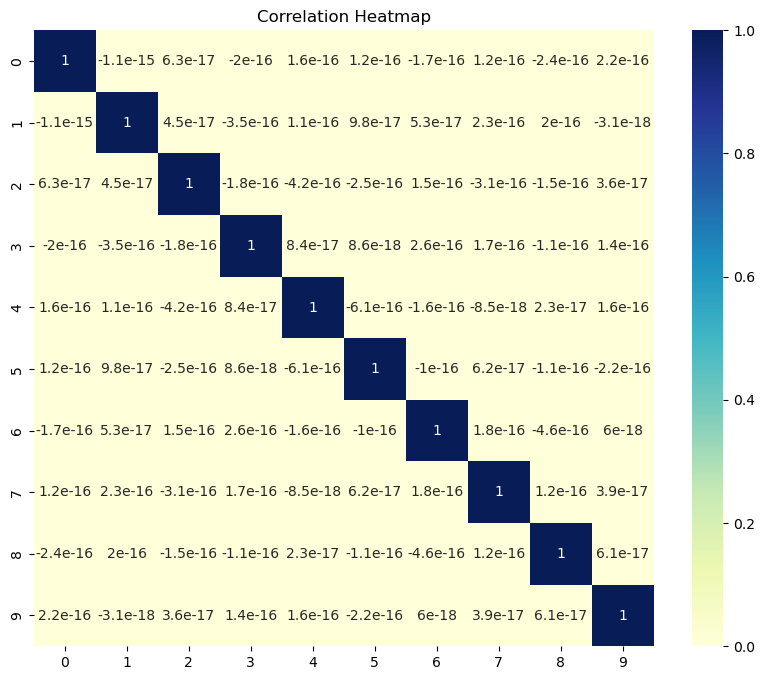

In [23]:
# Plot the correlation heatmap
corr_matrix = x_pca.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.25, random_state=0)

In [25]:
# Create and fit the Support Vector Machine classifier
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [26]:
# Make predictions on the test set
y_pred = svc.predict(X_test)


In [27]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[88  2]
 [ 3 50]]


In [28]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification report:")
print(report)
plt.show()

Classification report:
              precision    recall  f1-score   support

           B       0.97      0.98      0.97        90
           M       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143

